In [2]:
# !pip install netCDF4
!pip install pysd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.0/144.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.9 MB/s eta 0:00:00


In [4]:
#!pip install pylab
%pylab inline
import pysd
model = pysd.read_vensim('./bass.mdl')

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: ignored

In [5]:
model = pysd.load('./bass copy.py')
model.run(return_columns=['potential_customers'])

,potential_customers
0.0,100000.000000
0.1,99776.126751
0.2,99543.448043
0.3,99301.645636
0.4,99050.394331
...,...
999.6,33673.873563
999.7,33673.873563
999.8,33673.873563
999.9,33673.873563


In [ ]:
model.doc#()

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Customers,customers,None,person,"(nan, nan)",Stateful,Integ,None
1,Enemy customers,enemy_customers,None,person,"(nan, nan)",Stateful,Integ,None
2,FINAL TIME,final_time,None,Month,"(nan, nan)",Constant,Normal,The final time for the simulation.
3,INITIAL TIME,initial_time,None,Month,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Potential Customers,potential_customers,None,person,"(nan, nan)",Stateful,Integ,None
5,SAVEPER,saveper,None,Month,"(nan, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Month,"(nan, nan)",Constant,Normal,The time step for the simulation.
7,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.
8,change rate,change_rate,None,,"(nan, nan)",Auxiliary,Normal,None
9,change to enemy,change_to_enemy,None,person/Month,"(nan, nan)",Auxiliary,Normal,None


In [ ]:
values = model.run(return_columns=['Customers', 'Enemy customers', 'Potential Customers'])#, 'left me', 'left enemy', 'change to me',
#        'change to enemy'])
values.head(10)

,Customers,Enemy customers,Potential Customers
0.0,0.000000,0.000000,100000.000000
0.1,110.004678,110.651423,99779.343899
0.2,220.016698,222.746872,99557.236430
0.3,330.031241,336.280106,99333.688652
0.4,440.043498,451.244070,99108.712431
0.5,550.048671,567.630879,98882.320450
0.6,660.041971,685.431812,98654.526217
0.7,770.018626,804.637299,98425.344075
0.8,879.973877,925.236915,98194.789208
0.9,989.902981,1047.219372,97962.877648


# ДЗ

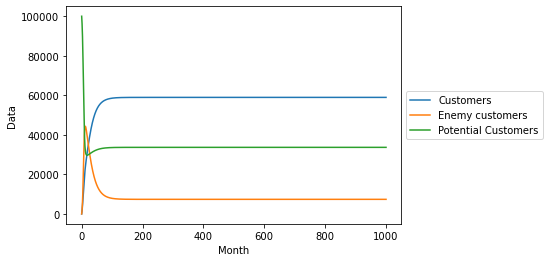

In [ ]:
# функция грубая, надо сделать меньше шаг, но правим saveper
import pandas as pd
model = pysd.load('./bass copy.py')
model.run(return_columns=['potential_customers'])

values = model.run(return_columns=['Customers', 'Enemy customers', 'Potential Customers'])

values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

In [ ]:
values_diff = values.diff()
values_diff['diff'] = abs(values_diff['Customers'])+abs(values_diff['Enemy customers'])+abs(values_diff['Potential Customers'])
values_diff_null = values_diff[values_diff['diff'] == 0]
print('Все отклонения по всем трем переменным равны:', values_diff_null['diff'].sum(), 
      '\nСходимость начинается с индекса:', values_diff_null.index[0], '\nСходится к константе по Customers:', round(values.iloc[5973, 0], 0))

Все отклонения по всем трем переменным равны: 0.0 
Сходимость начинается с индекса: 597.3 
Сходится к константе по Customers: 58951.0


In [ ]:
model.set_components(params={'fruitfulness':0.005})
model.components.fruitfulness()

# Читинг

In [6]:
import numpy as np

# задаем параметры модели, которые будем варьировать
p11 = np.linspace(0.01, 0.99, 5)
p13 = np.linspace(0.01, 0.99, 5)
p21 = np.linspace(0.01, 0.99, 5)
p23 = np.linspace(0.01, 0.99, 5)

# задаем количество точек в обучающей и проверочной выборках
n_train = 500
n_test = 100

# генерируем обучающую выборку
train_X = np.zeros((n_train, 4))
train_Y = np.zeros(n_train)

for i in range(n_train):
    # выбираем случайные значения параметров модели из заданных интервалов
    rand_p11 = np.random.choice(p11)
    rand_p13 = np.random.choice(p13)
    rand_p21 = np.random.choice(p21)
    rand_p23 = np.random.choice(p23)

    # вычисляем долю рынка по модели Басса
    p = (rand_p11 + rand_p13 + rand_p21 * rand_p13 / (rand_p13 + rand_p23)) / (1 + rand_p21)

    # сохраняем параметры модели и долю рынка
    train_X[i] = np.array([rand_p11, rand_p13, rand_p21, rand_p23])
    train_Y[i] = p

# генерируем проверочную выборку
test_X = np.zeros((n_test, 4))
test_Y = np.zeros(n_test)

for i in range(n_test):
    # выбираем случайные значения параметров модели из заданных интервалов
    rand_p11 = np.random.choice(p11)
    rand_p13 = np.random.choice(p13)
    rand_p21 = np.random.choice(p21)
    rand_p23 = np.random.choice(p23)

    # вычисляем долю рынка по модели Басса
    p = (rand_p11 + rand_p13 + rand_p21 * rand_p13 / (rand_p13 + rand_p23)) / (1 + rand_p21)

    # сохраняем параметры модели и долю рынка
    test_X[i] = np.array([rand_p11, rand_p13, rand_p21, rand_p23])
    test_Y[i] = p


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # Загрузим данные
# df = df_train

# # Разделим данные на признаки (X) и метки (y)
# X = df.drop(['Market Share'], axis=1)
# y = df['Market Share']

# Создадим объект модели линейной регрессии
model = LinearRegression()

# Обучим модель на обучающих данных
model.fit(train_X, train_Y)

# Сделаем предсказания на тестовых данных
y_pred = model.predict(test_X)

from sklearn.metrics import r2_score

# Оценим качество предсказаний модели
r2 = r2_score(test_Y, y_pred)
r2

0.9595720909835547

---

In [ ]:
# Оценка сходимости модели
p11 = np.arange(0.01, 0.1, 0.01)
p13 = np.arange(0.1, 1, 0.1)
p21 = np.arange(0.1, 1, 0.1)
p23 = np.arange(0.01, 0.1, 0.01)

for i in range(len(p11)):
    for j in range(len(p13)):
        for k in range(len(p21)):
            for l in range(len(p23)):
                params = {'Initial_Number_of_Customers': 500000,
                          'p11': p11[i],
                          'p13': p13[j],
                          'p21': p21[k],
                          'p23': p23[l],
                          'Frequency_of_Contacts': 0.7,
                          'Sensitivity': 0.03,
                          'Aggressiveness': 0.01}
                result = model.run(params=params, initial_condition=stocks, return_timestamps=[i for i in range(1, 11)])
                if abs(result['Cumulative_Number_of_Customers'][-1] - result['Cumulative_Number_of_Customers'][-2]) <= 0.0001:
                    print('Model is stable for parameters: p11 = %0.2f, p13 = %0.2f, p21 = %0.2f, p23 = %0.2f' % (p11[i], p13[j], p21[k], p23[l]))


# Варьирование параметров и построение ML модели
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Генерируем данные для обучения модели
params = {'Initial_Number_of_Customers': 500000,
          'Frequency_of_Contacts': 0.7,
          'Sensitivity': 0.03,
          'Aggressiveness': 0.

In [ ]:
mport numpy as np

def generate_data(p11_range, p13_range, p21_range, p23_range):
    data = []
    for p11 in p11_range:
        for p13 in p13_range:
            for p21 in p21_range:
                for p23 in p23_range:
                    # Set fixed parameters
                    p12 = 1 - p11
                    p22 = 1 - p21
                    p32 = 1 - p31 - p33
                    p33 = 1 - p13 - p23
                    initial_customers = 1000
                    word_of_mouth_demand = 1
                    sociability = 20
                    fruitfulness = 0.01
                    final_time = 100

                    # Run Bass model simulation
                    component = pm.Component()
                    potential_customer_concentration = component.add(pm.Division(pm.Variable("Potential Customers"), pm.Variable("total market")))
                    new_customers = component.add(pm.Variable("word of mouth demand"))
                    contacts_with_customers = component.add(pm.Multiplication(pm.Variable("Customers"), pm.Variable("sociability")))
                    contacts_of_noncustomers_with_customers = component.add(pm.Multiplication(pm.Multiplication(pm.Variable("contacts with customers"), pm.Variable("potential customer concentration")), pm.Constant(30)))
                    customers = component.add(pm.Integration(new_customers, initial_customers))
                    fruitfulness = component.add(pm.Constant(0.01))
                    potential_customers = component.add(pm.Integration(pm.Negation(new_customers), 1000000))
                    sociability = component.add(pm.Constant(20))
                    total_market = component.add(pm.Addition(customers, potential_customers))
                    word_of_mouth_demand = component.add(pm.Multiplication(contacts_of_noncustomers_with_customers, fruitfulness))

                    # Set variable parameters
                    p31 = 0
                    p33 = 1 - p13 - p23
                    component.set_variable("p11", p11)
                    component.set_variable("p12", p12)
                    component.set_variable("p13", p13)
                    component.set_variable("p21", p21)
                    component.set_variable("p22", p22)
                    component.set_variable("p23", p23)
                    component.set_variable("p31", p31)
                    component.set_variable("p32", p32)
                    component.set_variable("p33", p33)
                    component.set_variable("Customers", initial_customers)
                    component.set_variable("contacts with customers", contacts_with_customers)
                    component.set_variable("Potential Customers", 1000000)
                    component.set_variable("sociability", sociability)

                    simulator =

---

---

---

---

---

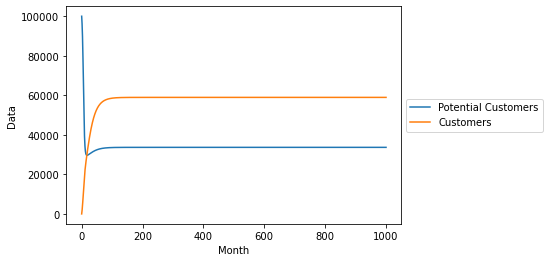

In [ ]:
values = model.run(return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

,Customers
0.0,0.000000
1.0,17787.399210
3.0,77960.530997
7.0,92140.799233
9.5,92173.996150


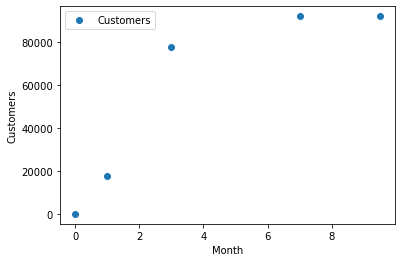

In [ ]:
values = model.run(return_timestamps=[0,1,3,7,9.5], return_columns=['Customers'])
values.plot(linewidth=0, marker='o')
plt.ylabel('Customers')
plt.xlabel('Month')
values.head()

Text(0.5, 0, 'Month')

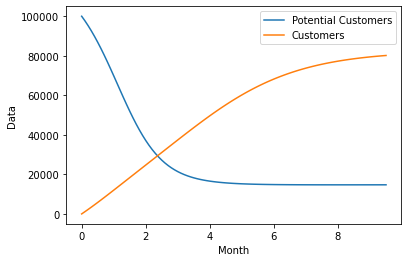

In [ ]:
# sociability - это contact rate. Он уменьшился, значит мы менее привлекаем. За 10 шагов не успели исчерпать рынок
values = model.run(params={'sociability':40},return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')

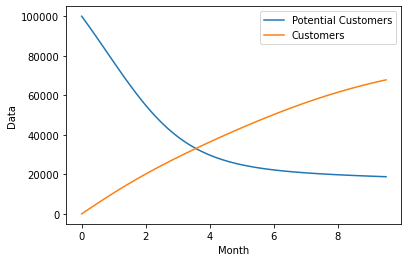

In [ ]:
# несмотря на то, что sociabiity - константа, на ее вход можно подать time series, шаг может быть неравномерный
import pandas as pd
soc_timeseries = pd.Series(index=range(30), data=range(20,50,1))
values = model.run(params={'sociability':soc_timeseries},return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

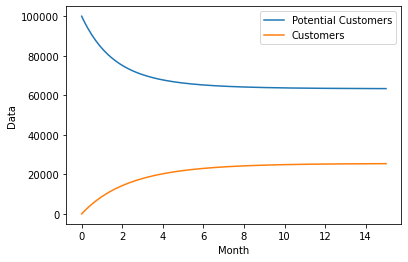

In [ ]:
# fruitfulness - сарафанное радио
# все эти p1, p2 - это эта игра константами, как мы сейчас поменяли fruitfulness c 0.002 на 0.005, только мы это делаем в цикле
# сначала находим final_time - убедились, что модель сошлась, 
# потом внешний цикл меняет параметры
# пошли if'ать - сошлись/не сошлись, записали (что такое сошлись - позже)
model = pysd.load('./bass copy.py')
values = model.run(final_time=15,params={'fruitfulness':0.003},return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

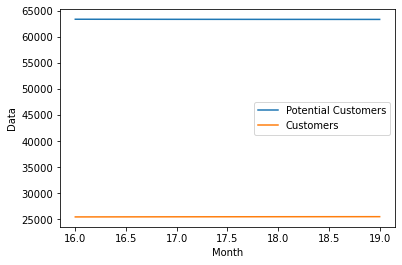

In [ ]:
# current - стартовать с предыдущего значения
values = model.run(initial_condition='current',return_columns=['Potential Customers', 'Customers'],return_timestamps=list(range(16,20)))
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

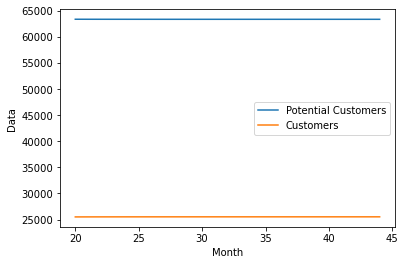

In [ ]:
values = model.run(return_columns=['Potential Customers', 'Customers'],return_timestamps=list(range(20,45)))
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

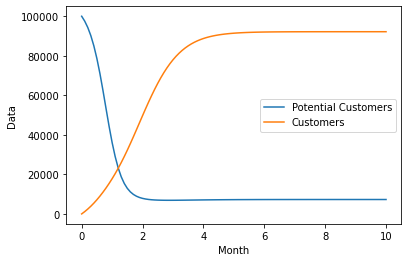

In [ ]:
# original - вернуться к дефолту (то что в py файле указано)
# В ДЗ СМОТРИМ НЕ НА САМИ КОНТЕЙНЕРЫ, а на их долю относительно общего рынка
model = pysd.load('./bass copy.py')
values = model.run(initial_condition='original',return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

In [ ]:
model.components.customers()

92174.37069193614

In [ ]:
# set_components - изменить навсегда на константу, пока не вызовем original
model.set_components(params={'fruitfulness':0.005})
model.components.fruitfulness()

0.005

In [ ]:
# reload - а то она работает с того момента, на котором остановились. Лучше reload, чем заново load, чтобы модельные переменные не обнулялись
model.reload()
model.components.fruitfulness()

0.15

1. Создать контейнер
2. Создать четыре стрелочки